<a href="https://www.kaggle.com/code/tolgatanrisever/titanic-eda?scriptVersionId=107893945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<font size=20></font>
# Introduction
The sinking Of Titanic is one of the most notorious shipwrdeks in the history .<br> In 1912, during her voyage, the Titanic sank after colliding with an icebergkilling 1502 out of 2224 passenger and crew

<font color ='red'>
Content:
</font>

[1. Load and Check Data](#1)<br><br>
[2. Variable Description](#2)<br><br>
[3. Univariate Variable Analysis](#3)<br>
&emsp;[3.1. Categorical Variable Analysis](#4)<br>
&emsp;[3.2 Univariate Variable Analysis](#5)<br><br>
[4. Basic Data Analysis](#6)<br><br>
[5. Outlier Detecttion](#7)<br><br>
[6. Missing Value](#8)<br>
&emsp;[6.1. Find Missing Value](#9)<br>
&emsp;[6.2 Fill Missing Value](#10)<br><br>
[7. Visualization ](#11)<br>
     &emsp;[Correlation Between SibSb -- Parch -- Age -- Fare -- Survived](#12)<br>
     &emsp;[SibSb -- Survived](#13)<br>
     &emsp;[Parch -- Survived](#14)<br>
     &emsp;[Pclass -- Survived](#15)<br>
     &emsp;[Age -- Survived](#16)<br>
     &emsp;[Pclass -- Survived -- Age](#17)<br>
     &emsp;[Embarked -- Sex -- Pclass -- Survived](#18)<br>
     &emsp;[Embarked -- Sex -- Fare -- Survived](#19)<br>
     &emsp;[Fill Missing: Age Feature](#20)<br><br>
[8.Feature Engineering](#21)<br>
&emsp;[Name--Title](#22)<br>
&emsp;[Family Size](#23)<br>
&emsp;[Embarked](#24)<br>
&emsp;[Ticket](#25)<br>
&emsp;[Pclass](#26)<br><br>

[9.Modeling](#27)<br>
&emsp;[Train - Test Spli](#28)<br>
&emsp;[Simple Logistic Regression](#29)<br>
&emsp;[Hyperparameter Tuning -- Grid Search -- Cross Validation](#30)<br>
&emsp;[Ensemble Modeling](#31)<br>
&emsp;[Prediction and Submission](#32)<br>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id='1'></a><br>
#  1. Load and Check Data


In [2]:
#plt.style.available

In [3]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_PasssengerId=test_df["PassengerId"]

In [4]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='2'></a><br>
# 2. Variable Description

1 PassengerId uqnique id number to each passenger<br>
2 Survived live(1) died(0)<br>
3 Pclass passenger class<br>
4 Name <br>
5 Sex <br>
6 Age <br>
7 SibSpb number od siblings/spouse <br>
8 Parch number of parents/children<br>
9 Ticket ticket number<br>
10 Fare amount of money spent on ticket<br>
11 Cabin <br>
12 Embarked <br>

------------------------
 |#| Column        Dtype<br>    
 0   PassengerId      int64 <br>
 1   Survived         int64 <br> 
 2   Pclass           int64  <br>
 3   Name             object <br>
 4   Sex              object <br>
 5   Age              float64<br>
 6   SibSp            int64  <br>
 7   Parch            int64  <br>
 8   Ticket           object <br>
 9   Fare             float64<br>
 10  Cabin            object <br>
 11  Embarked         object <br>
dtypes: float64(2), int64(5), object(5)

In [7]:
#train_df.info()
# liste=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
# for index,i in enumerate(liste):
#     print (index+1,i,"<br>")

<a id='3'></a><br>
# 3. Univariate Variable Analysis<br>
* Categorical Variable : Survived,Sex,Pclass,Embark,Cabin,Name,Sibsp ,Parch
* Numerical Variable: Age,PassengerId, Fare

<a id='4'></a><br>
> # 3.1. Categorical Variable Analysis<br>


In [8]:
import plotly_express as px
def barplots(variable):
    fig = px.histogram(train_df,
                       x=variable,
                       marginal='box',
                       title=variable,
                       width=600,
                       height=300,
                       color_discrete_sequence=['indianred']
                       )
    fig.update_layout(bargap=0.1)
    fig.show()

In [9]:
category1=[ 'Survived', 'Pclass','Sex', 'SibSp',
       'Parch', 'Embarked', 'PassengerId','Age' ,'Fare','Name', 'Ticket', 'Cabin' ]
for i in category1:
    barplots(i)

In [10]:
def bar_plot(variable):
    """
    input : variable ex :"sex"
    output : bar plot  value count
    """
    #get feature
    var =train_df[variable]
    #count number of categorical variable
    varValue=var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequence")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))

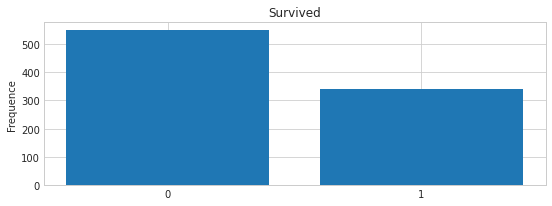

Survived:
 0    549
1    342
Name: Survived, dtype: int64


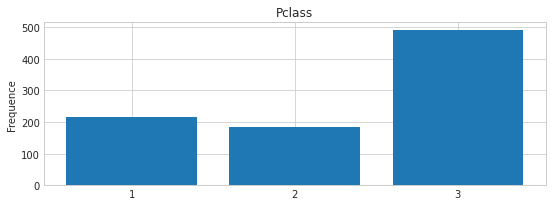

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


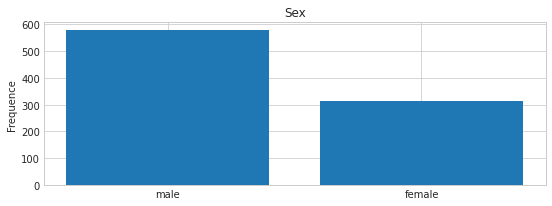

Sex:
 male      577
female    314
Name: Sex, dtype: int64


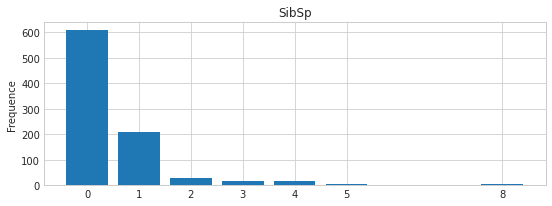

SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


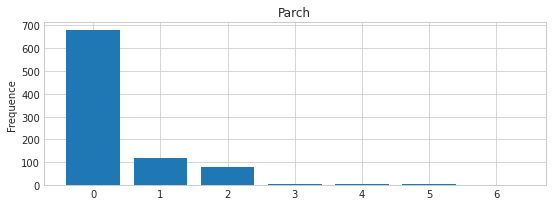

Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


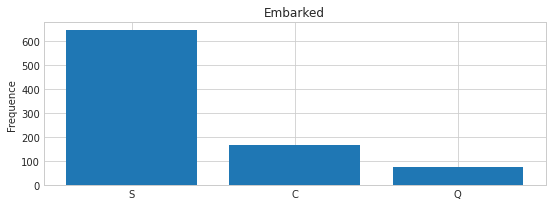

Embarked:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:

category1=[ 'Survived', 'Pclass','Sex', 'SibSp',
       'Parch', 'Embarked']
for variable in category1:
    bar_plot(variable)
    

In [12]:
category2=['Name', 'Ticket', 'Cabin' ]
for i in category2:
    print("----{}----\n{} \n".format(i,train_df[i].value_counts()))

----Name----
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

----Ticket----
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

----Cabin----
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dty

#### When variables with multiple categories are plotted, we do not see much meaningful data.
Name ,Ticket,Cabin

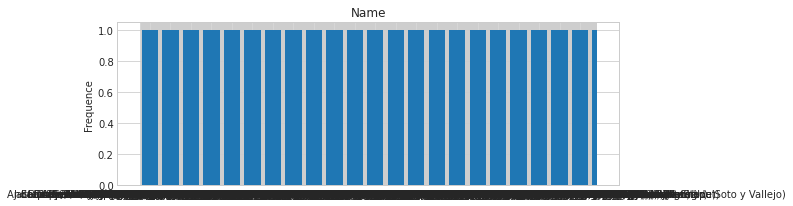

Name:
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


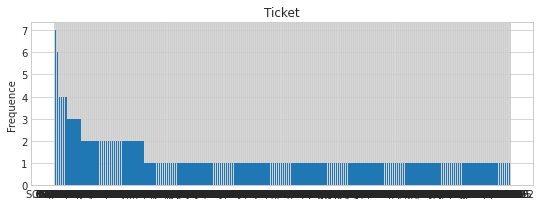

Ticket:
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


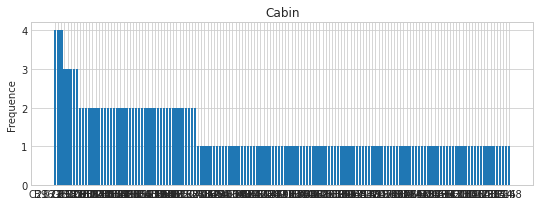

Cabin:
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


In [13]:
category2=['Name', 'Ticket', 'Cabin' ]
for variable in category2:
    bar_plot(variable)

<a id='5'></a><br>
> # 3.2 Numerical Variable Analysis<br>


In [14]:
def plot_hist(variable):
    """
    input : variable ex :PassengerId"
    output : bar plot  value count
    """
    #get feature
    var=train_df[variable]
    #count number of categorical variable
    varValue=var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequence")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))



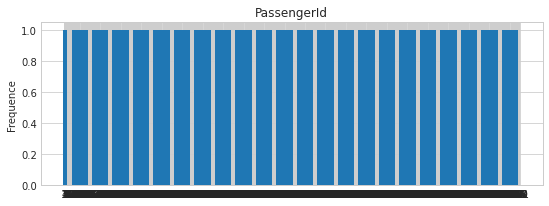

PassengerId:
 1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


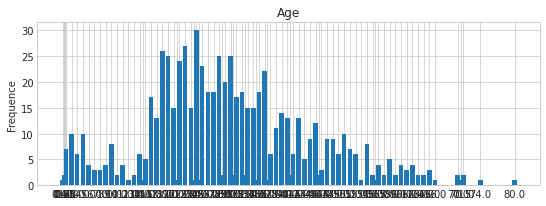

Age:
 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


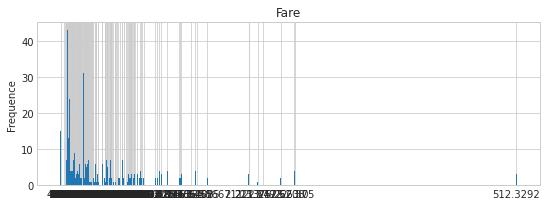

Fare:
 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [15]:
numerical=['PassengerId','Age' ,'Fare']
for variable in numerical:
    plot_hist(variable)

In [16]:
def plot_hisst1(variable):
    plt.figure(figsize=(25,10))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequence")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [17]:
# train_df.Fare.plot(kind = 'hist',figsize = (12,12),bins=50)
# plt.xlabel('assengerId')           
# plt.ylabel('frequance')
# plt.title('PassengerId histogram') 


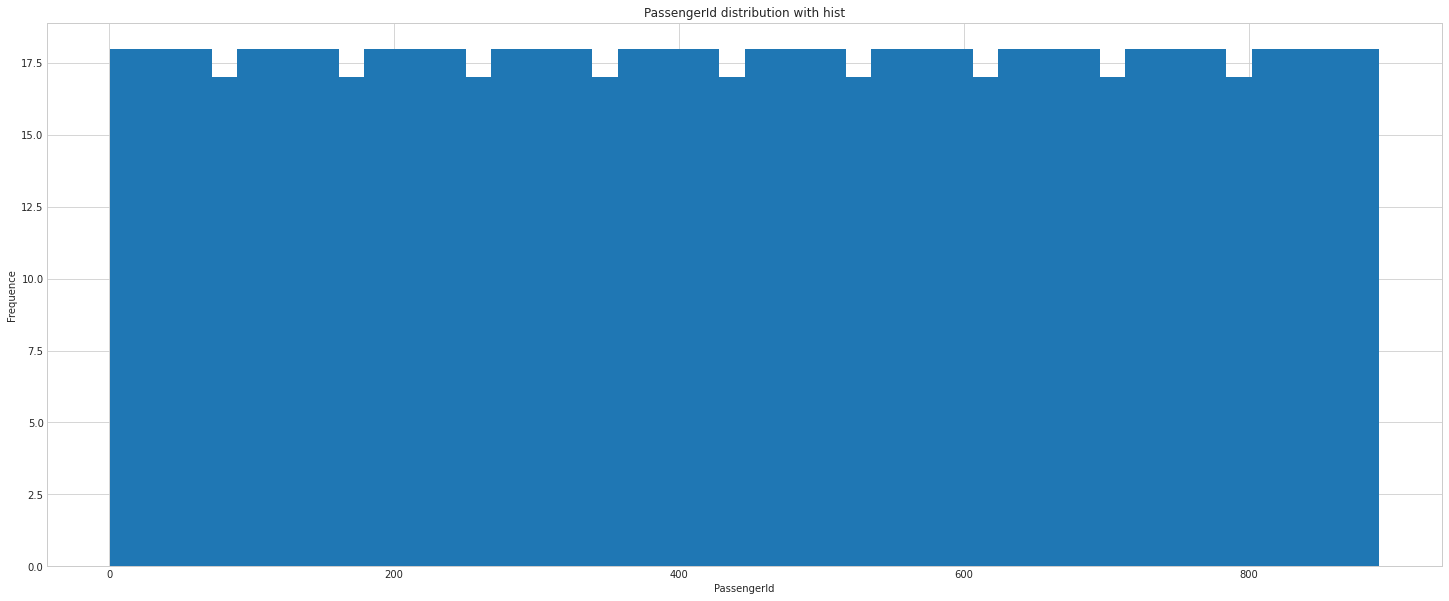

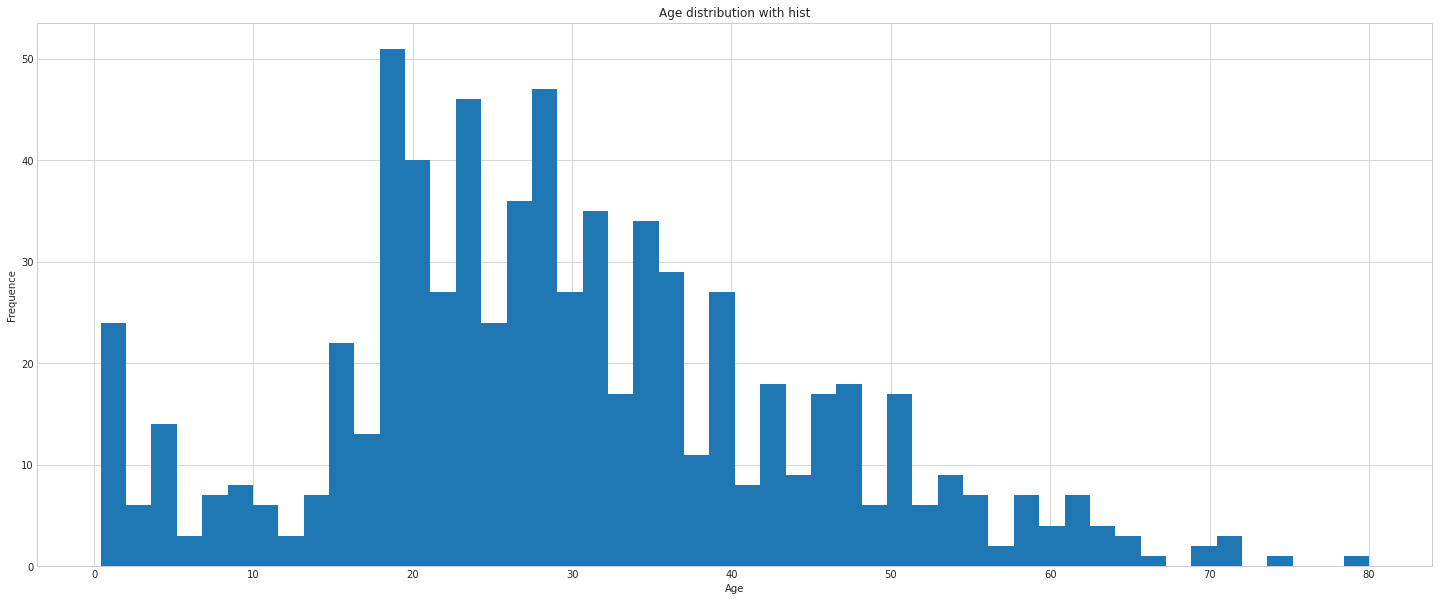

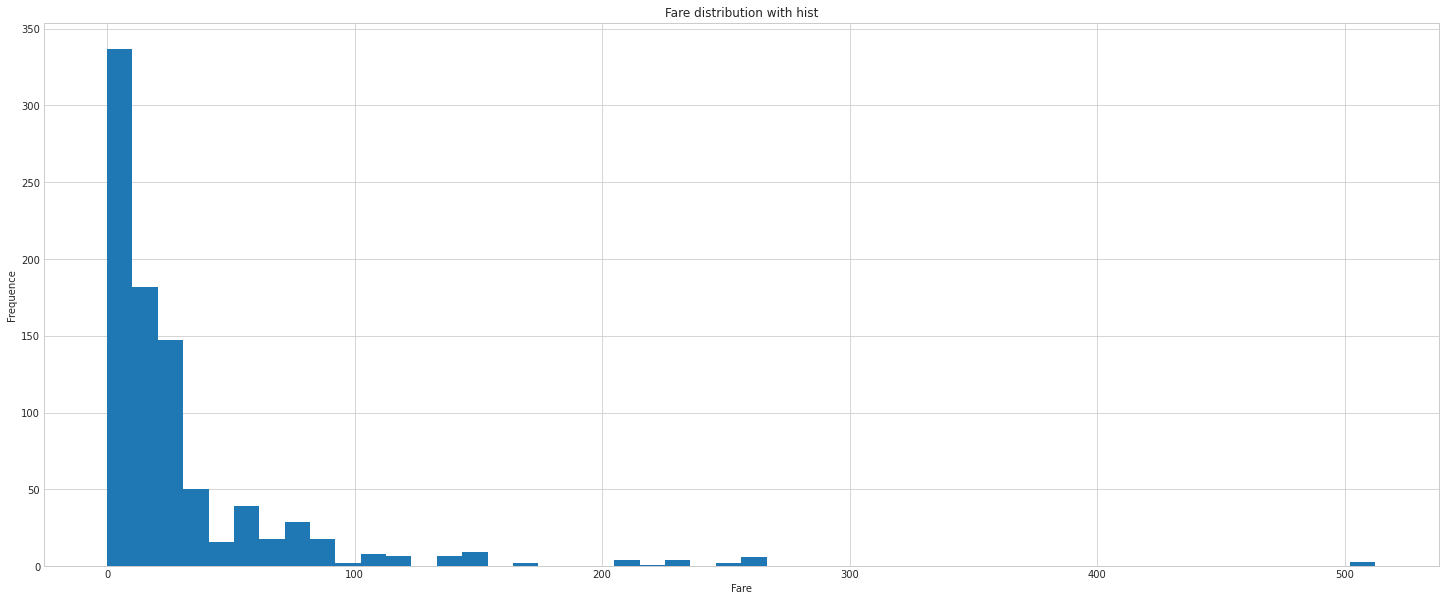

In [18]:
numerical=['PassengerId','Age' ,'Fare']
for variable in numerical:
    plot_hisst1(variable)

In [19]:
# train_df["Age"].plot(kind = 'hist',grid=True,alpha=0.9,subplots=True,figsize=(25,10),bins=50)


<a id='6'></a><br>
# 4. Basic Data Analysis<br>
* Pclass-Survived
* sex-Survived
* SibSp-Survived
* Parch-Survived


In [20]:
#Pclass-Survived
train_df[["Pclass","Survived","Sex"]].groupby(["Pclass","Sex"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,Pclass,Sex,Survived
5,3,male,0.135447
3,2,male,0.157407
1,1,male,0.368852
4,3,female,0.500000
2,2,female,0.921053
0,1,female,0.968085


In [21]:
pcS=train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(pcS,
                x='Pclass',
                y='Survived',
                color='Survived',
                text='Pclass',
                title='Pclass-Survived relationship',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(pcS)

   Pclass  Survived
2       3       491
0       1       216
1       2       184


In [22]:
pcSm=train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(pcSm,
                x='Pclass',
                y='Survived',
#                 base='Pclass',
                color='Survived',
                title='Pclass Survived mean relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(pcSm)


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [23]:
#"Sex","Survived"
ssm=train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(ssm,
                x='Sex',
                y='Survived',
                title='Sex Survived mean relationship ',
                color='Survived',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(ssm)


      Sex  Survived
0  female  0.742038
1    male  0.188908


In [24]:
#"Sex","Survived"
ss=train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(ss,
                x='Sex',
                y='Survived',
                color='Survived',
                title='Sex Survived relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(ss)

      Sex  Survived
1    male       577
0  female       314


In [25]:
sibSm=train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(sibSm,
                x='SibSp',
                y='Survived',
                color='Survived',
                title='SibSp Survived mean relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(sibSm)

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [26]:
sibS=train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).count().sort_values(by="Survived",ascending=False)
fig=px.bar(sibS,
                x='SibSp',
                y='Survived',
                color='Survived',
                title='SibSp Survived  relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(sibS)

   SibSp  Survived
0      0       608
1      1       209
2      2        28
4      4        18
3      3        16
6      8         7
5      5         5


In [27]:
parchSm=train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)
fig=px.bar(parchSm,
                x='Parch',
                y='Survived',
                color='Survived',
                title='Parch Survived mean  relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(parchSm)

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


In [28]:
parchS=train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).count().sort_values(by="Survived",ascending=True)
fig=px.bar(parchS,
                x='Parch',
                y='Survived',
                color='Survived',
                title='Parch Survived relationship ',
                width=600,
                height=300,)
fig.update_traces()
fig.show()
print(parchS)

   Parch  Survived
6      6         1
4      4         4
3      3         5
5      5         5
2      2        80
1      1       118
0      0       678


<a id='7'></a><br>
> # 5. Outlier Detecttion<br>
featuresthat corrupt our data


In [29]:
def detect_qoutliers(df,features):
    outlier_indices=[]
    
    for c in features:
        #1quartile
        Q1=np.percentile(df[c],25)
        #3quartile
        Q3=np.percentile(df[c],75)
        #IQR 
        IQR=Q3-Q1
        
        #Outlier step
        outlier_step=IQR*1.5
        
        #detect outlier and their indices
        outlier_list_col=df[(df[c]<Q1-outlier_step)|(df[c]>Q3+outlier_step)].index
        
        #store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)   
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)
    return multiple_outliers

In [30]:
train_df.loc[detect_qoutliers(train_df,['SibSp','Parch','Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [31]:
train_df=train_df.drop(detect_qoutliers(train_df,['SibSp','Parch','Fare']),axis=0).reset_index(drop=True)

In [32]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id='8'></a><br>
> # 6. Missing Value<br>




In [33]:
train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [34]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<a id='9'></a><br>
> # 6.1 Find Missing Value<br>



In [36]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [37]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id='10'></a><br>
> # 6.2 Fill Missing Value<br>

* Embarked has 2 missing value
* Fare has only 1


In [38]:
train_df["Embarked"].isnull()
pd.isnull(train_df["Embarked"])

0       False
1       False
2       False
3       False
4       False
        ...  
1294    False
1295    False
1296    False
1297    False
1298    False
Name: Embarked, Length: 1299, dtype: bool

In [39]:
#train_df[train_df["Embarked"].isnull()]
train_df[pd.isnull(train_df["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

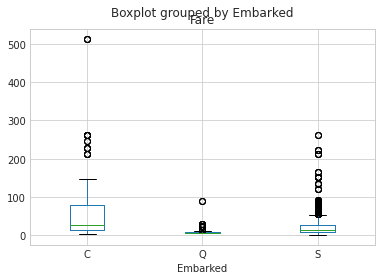

In [40]:
train_df.boxplot(column="Fare",by="Embarked")
#Buradaki boş değere sahip yolcualrın ödedikleri bilet parasına bakılırsa c limanından binmiş olma ihtimalleri çok yüksek
## Considering the ticket money paid by the passengers with empty values here, it is very likely that they got on from port c.

In [41]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[pd.isnull(train_df["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [42]:
train_df[pd.isnull(train_df["Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [43]:
mean_fare=np.mean(train_df[train_df["Pclass"]==3]["Fare"])

In [44]:
train_df["Fare"]=train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [45]:
train_df[train_df["PassengerId"]==1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.74122,NaN,S


<a id='11'></a><br>
# 7. Visualization 


<a id='12'></a><br>
## Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

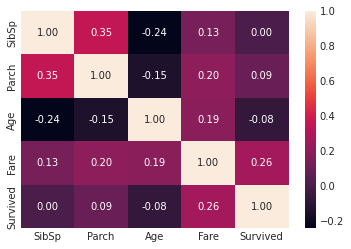

In [46]:
list1=["SibSp", "Parch" ,"Age" ,"Fare" ,"Survived"]
sns.heatmap(train_df[list1].corr(), annot=True , fmt=".2f")
plt.show()

Fare feature seems to have correaltion with survived feature(0.26)

<a id='13'></a><br>
## Sibsp-- Survived

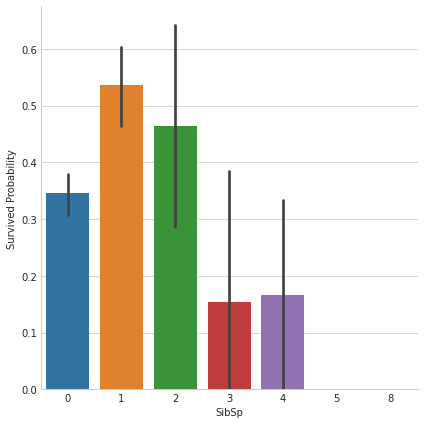

In [47]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

1. Having a lot of SibSp have less chance to survive.
1. if sibsp == 0 or 1 or 2, passenger has more chance to survive
1. we can consider a new feature describing these categories.

<a id='14'></a><br>
## Parch -- Survived

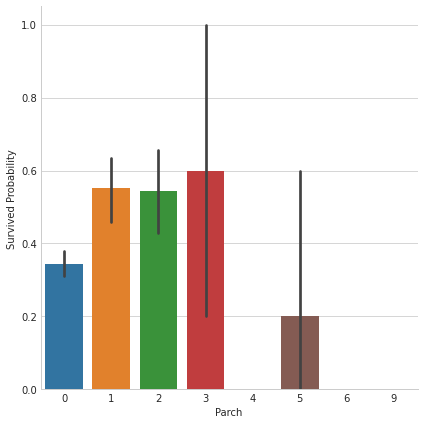

In [48]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

1. Sibsp and parch can be used for new feature extraction with th = 3
1. small familes have more chance to survive.
1. there is a std in survival of passenger with parch = 3

<a id='15'></a><br>
## Pclass -- Survived

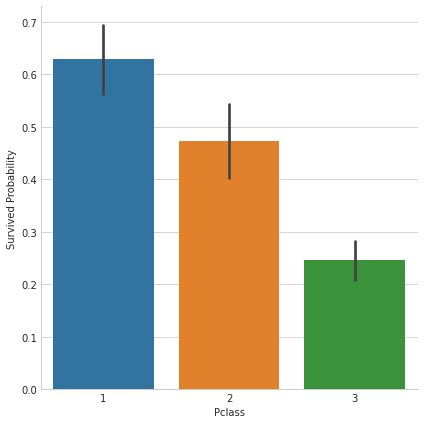

In [49]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

<a id='16'></a>
## Age -- Survived

In [50]:
df=train_df[:881]

In [51]:
import plotly_express as px
fig = px.histogram(df, x='Age',  color='Pclass',barmode='overlay',facet_row="Survived",
            width=500, height=400)
fig.show()
# 

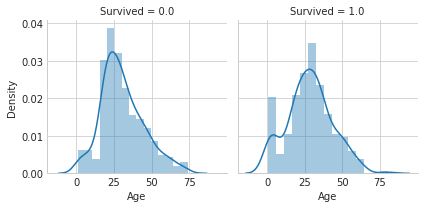

In [52]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 15)
plt.show()




* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

<a id='17'></a>
## Pclass -- Survived -- Age

In [53]:
import plotly_express as px
fig = px.histogram(df, x='Age',color='Pclass',barmode='overlay',facet_col='Survived',facet_row='Pclass',
            width=500, height=400)
fig.show()

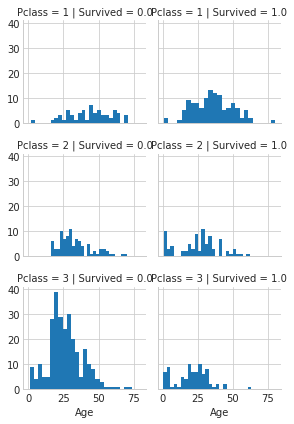

In [54]:
g = sns.FacetGrid(df, col = "Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

pclass is important feature for model training.

<a id='18'></a>
## Embarked -- Sex -- Pclass -- Survived

In [55]:
fig=px.histogram(df,x="Pclass",facet_row="Survived",facet_col="Embarked",color="Sex",barmode='overlay'
    ,width=500, height=400)
fig.show()

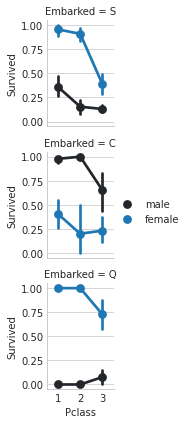

In [56]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survşval rate in pclass 3 in C.
* embarked and sex will be used in training.

<a id='19'></a>
## Embarked -- Sex -- Fare -- Survived

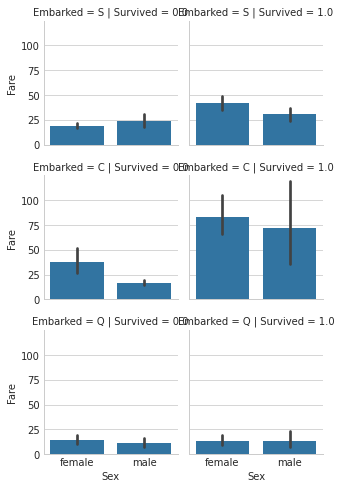

In [57]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Passsengers who pay higher fare have better survival. Fare can be used as categorical for training

<a id='20'></a>
## Fill Missing: Age Feature

In [58]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


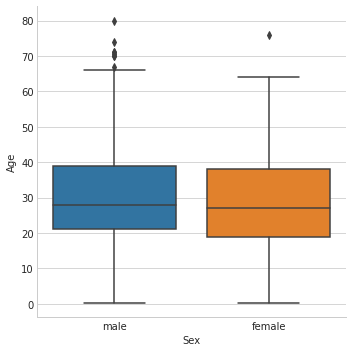

In [59]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

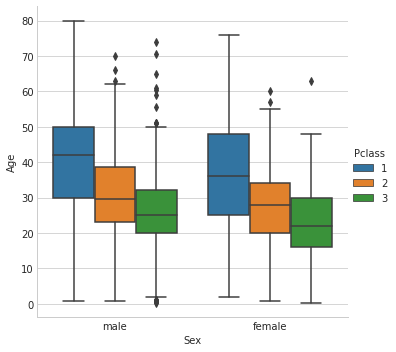

In [60]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

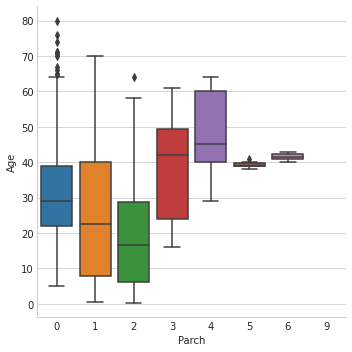

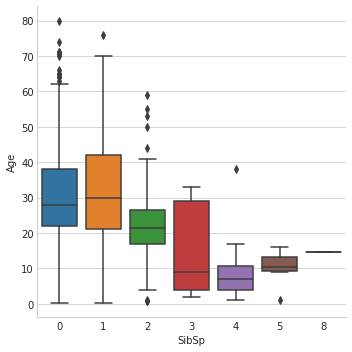

In [61]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

In [62]:
#train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

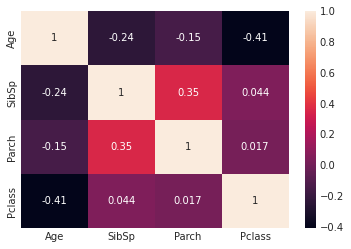

In [63]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.


In [64]:

index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [65]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id='21'></a>
# 8 Feature Engineering

<a id='22'></a>
## Name--Title

In [66]:
name=train_df["Name"]
train_df["title"]=[i.split(".")[0].split(",")[-1].strip()for i in name]
train_df.title

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1294        Mr
1295      Dona
1296        Mr
1297        Mr
1298    Master
Name: title, Length: 1299, dtype: object

In [67]:
fig=px.histogram(train_df,x="title",barmode='overlay',color="title",width=500, height=400)
fig.show()




one of the notables of Spain, Don=MR<br>
Rev means priest or reverend, Rev=Mr<br>
Mme means lady in french, Mme=Ms<br>
there are 2 Majors in the data, they are male Major=Mr<br>
Layd=Ms<br>
Sir is an official English form of address for men, derived from the Latin word Sire, used in the Middle Ages. Sir=Mr<br>
there are 2 Mlle in the data, they are female Mlle=Ms<br>
there are 4 Col in the data, they are male Col=Mr<br>
there are 1 Capt in the data, they are male Capt=Mr<br>
Countess, a title of nobility in Europe the countess =Ms<br>
Jonkheer and its female equivalent, Jonkvrouw, designate a Dutch and Belgian name and base Jonkheer=Mr<br>
dona means lady in spanish Dona=Ms<br>

In [68]:
train_df["title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [69]:
train_df["Name"][train_df.title=="Mrs"]

1       Cumings, Mrs. John Bradley (Florence Briggs Th...
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
15                       Hewlett, Mrs. (Mary D Kingcome) 
                              ...                        
1264                  McNamee, Mrs. Neal (Eileen O'Leary)
1272       Lines, Mrs. Ernest H (Elizabeth Lindsey James)
1276       Smith, Mrs. Lucien Philip (Mary Eloise Hughes)
1278    Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...
1292      Minahan, Mrs. William Edward (Lillian E Thorpe)
Name: Name, Length: 197, dtype: object

In [70]:
train_df["title"]=train_df["title"].replace(["Dr","Master"],"other")

In [71]:
train_df["title"]=train_df["title"].replace(["Don","Rev","Major","Sir","Col","Capt","Jonkheer"],"Mr")
train_df["title"]=train_df["title"].replace(["Mme","Lady","Mlle","the Countess","Dona","Mrs","Miss"],"Ms")

In [72]:
train_df["title"].unique()

array(['Mr', 'Ms', 'other'], dtype=object)

In [73]:
train_df["title"]=[0 if i == "Mr"  else 1 if i =="Ms" else 2  for i in train_df["title"]]

In [74]:
train_df["title"].unique()

array([0, 1, 2])

In [75]:
fig=px.histogram(train_df,x="title",barmode='overlay',color="title",width=500, height=400,title="Mr(0) & Ms(1) Others(2)")

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(0, 153, 0,0.5)'})
fig.show()

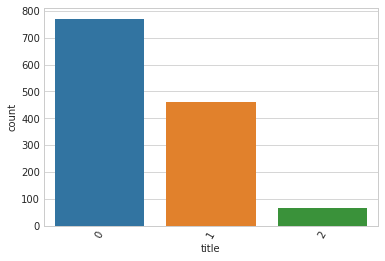

In [76]:
sns.countplot(x="title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

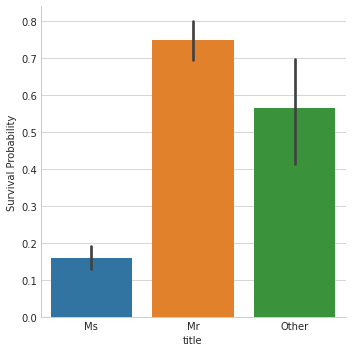

In [77]:
g = sns.factorplot(x = "title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Ms","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [78]:
df_1=train_df[:881]

In [79]:
fig = px.pie(df_1, values='Survived', names='title', title='Survival Probability',
            hover_data=['Survived'], labels={'Survived':'Survived'})
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(0, 153, 0,0.5)'})
    
fig.show()

In [80]:
fig=px.histogram(df_1,x="title",barmode='overlay',color="title",facet_col="Survived"
                 ,width=500, height=400,title="Mr(0) & Ms(1) Others(2)")

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(0, 153, 0,0.5)'})
fig.show()

In [81]:
train_df.drop(labels=["Name"],axis=1,inplace=True)

In [82]:
train_df.head(19)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0.0,3,male,25.0,0,0,330877,8.4583,NaN,Q,0
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,2
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,C,1


In [83]:
train_df=pd.get_dummies(train_df,columns=["title"])

In [84]:
train_df["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     17
5      6
8      2
Name: SibSp, dtype: int64

<a id='23'></a>
## Family Size

In [85]:
train_df["Fsize"]=train_df["Parch"]+train_df["SibSp"]+1

In [86]:
df=train_df[:881]

In [87]:
fig = px.bar(df, x="Fsize", y="Survived",title="",color="Survived",width=700, height=600)
fig.show()

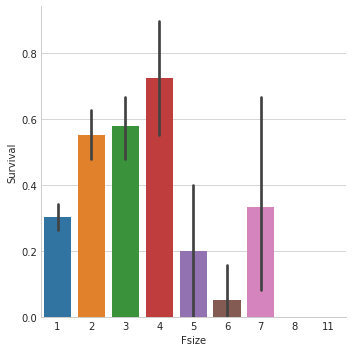

In [88]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [89]:
train_df["Family-Size"]=[1 if i>5 else 0 for i in train_df["Fsize"]]

In [90]:
fig=px.bar(train_df,x=["Family-Size"],y="Survived",color="Family-Size",width=500, height=400)
fig.show()

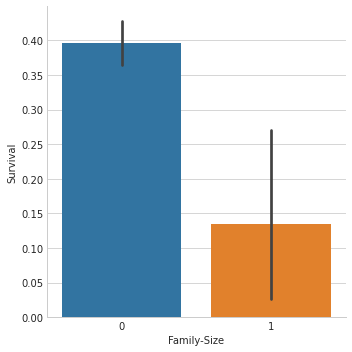

In [91]:
g = sns.factorplot(x = "Family-Size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small familes have more chance to survive than large families.

In [92]:
train_df = pd.get_dummies(train_df, columns= ["Family-Size"])


In [93]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_0,title_1,title_2,Fsize,Family-Size_0,Family-Size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,2,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,2,1,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,1,1,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,2,1,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,1,0
5,6,0.0,3,male,25.0,0,0,330877,8.4583,NaN,Q,1,0,0,1,1,0
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,1,0,0,1,1,0
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,5,1,0
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,0,1,0,3,1,0
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,2,1,0


<a id='24'></a>
## Embarked

In [94]:
train_df["Embarked"].value_counts()

S    904
C    272
Q    123
Name: Embarked, dtype: int64

In [95]:
fig=px.bar(train_df,x="Embarked",y="Survived",color="Survived",width=500,height=400,title="Embarked ")
fig.show()

In [96]:
train_df=pd.get_dummies(train_df, columns=["Embarked"])

In [97]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,title_0,title_1,title_2,Fsize,Family-Size_0,Family-Size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,2,1,0,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,2,1,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1,1,0,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,2,1,0,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,1,0,0,1,1,0,0,0,1
5,6,0.0,3,male,25.0,0,0,330877,8.4583,NaN,1,0,0,1,1,0,0,1,0
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,1,0,0,1,1,0,0,0,1
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,0,0,1,5,1,0,0,0,1
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,0,1,0,3,1,0,0,0,1
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,0,1,0,2,1,0,1,0,0


<a id='25'></a>
## Ticket

In [98]:
train_df["Ticket"]

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1294             A.5. 3236
1295              PC 17758
1296    SOTON/O.Q. 3101262
1297                359309
1298                  2668
Name: Ticket, Length: 1299, dtype: object

In [99]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [100]:
train_df.Ticket

0            A5
1            PC
2        STONO2
3             x
4             x
         ...   
1294         A5
1295         PC
1296    SOTONOQ
1297          x
1298          x
Name: Ticket, Length: 1299, dtype: object

In [101]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,1,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,1,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,male,54.0,0,0,51.8625,E46,1,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id='26'></a>
## Pclass

In [102]:
train_df.Pclass.value_counts()

3    702
1    320
2    277
Name: Pclass, dtype: int64

In [103]:
fig=px.bar(train_df,x="Pclass",y="Survived",color="Survived",width=600,height=400)
fig.show()

In [104]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,title_0,title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,0,0,8.0500,NaN,1,0,...,0,0,0,0,0,0,1,0,0,1


In [105]:
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,title_0,title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,0,0,8.0500,NaN,1,0,...,0,0,0,0,0,0,1,0,0,1


<a id='27'></a>
## Sex

In [106]:
fig=px.bar(train_df,x="Sex",y="Survived",color="Survived",width=600,height=400)
fig.show()

In [107]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,title_0,title_1,title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,1,0,0,...,0,0,0,0,1,0,0,1,0,1


<a id='27'></a>
## Drop Passenger Id and Cabin

In [108]:
train_df.drop(labels=["PassengerId","Cabin"],axis=1,inplace=True)

In [109]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'title_0', 'title_1',
       'title_2', 'Fsize', 'Family-Size_0', 'Family-Size_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4',
       'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE',
       'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH',
       'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP',
       'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ',
       'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')

<a id='28'></a>
# 9.Modeling


In [110]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id='29'></a>
##  Train - Test Split

In [111]:
train_df_len

881

In [112]:
test=train_df[train_df_len:]
test.drop(labels=["Survived"],axis=1,inplace=True)

In [113]:
test.head()

,Age,SibSp,Parch,Fare,title_0,title_1,title_2,Fsize,Family-Size_0,Family-Size_1,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
881,34.5,0,0,7.8292,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,2,1,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,1,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,3,1,0,...,0,0,0,0,1,0,0,1,1,0


In [114]:
train = train_df[:train_df_len]
X_train=train.drop(labels="Survived",axis=1)
y_train=train["Survived"]
y_train.astype(int)
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,random_state=42,test_size=0.33)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


 <a id='30'></a>
##  Simple Logistic Regression

In [115]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

<a id='27'></a>
 Train - Test Split

In [116]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.37
Testing Accuracy: % 81.44


 <a id='31'></a>
# Hyperparameter Tuning -- Grid Search -- Cross Validation¶<br>
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.<br><br>

* Decision Tree<br>
* SVM<br>
* Random Forest<br>
* KNN<br>
* Logistic Regression<br>

In [117]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [118]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8389830508474576
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7932203389830508
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  2.7min finished


0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7847457627118644
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7796610169491526


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.2s finished


Text(0.5, 1.0, 'Cross Validation Scores')

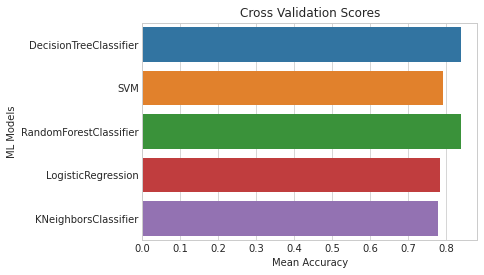

In [119]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")




 <a id='32'></a>
##  Ensemble Modeling


In [120]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8350515463917526


 <a id='33'></a>
#  Prediction and Submission

In [121]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PasssengerId, test_survived],axis = 1)
results.to_csv("Titanic.csv", index = False)
